# Test PDPbox with binary classification problem
## Kaggle Titanic with XGBoost
This demo is based on **Titanic: Machine Learning from Disaster**  
https://www.kaggle.com/c/titanic/details/tutorials

In [1]:
import pandas as pd
from pdpbox import pdp, get_dataset, info_plots
import matplotlib
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
pd.set_option('display.max_columns', None)

# versions
- `xgboost`: 1.3.3
- `matplotlib`: 3.1.1
- `sklearn`: 0.23.1

# or you can directory load the data and model

In [4]:
df = pd.read_csv(r'Data/rf_test.csv')

In [5]:
FEATURE = 'PAY_1'
FEATURE2 = 'PAY_AMT2'

In [6]:
X = df.drop(columns = ['default.payment.next.month'])
y = df['default.payment.next.month']
target = 'default.payment.next.month'

# 1. Binary feature: Sex

## 1.1 target distribution through feature $FEATURE$

In [7]:
df

LIMIT_BAL  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
0      440000.0      0      0      0      0      0      0   164269.0   
1       50000.0      1      2      0      0      0      0    51210.0   
2       50000.0      1      2      0      0      0      0    64069.0   
3       80000.0      0      0      0      0      0      2    57776.0   
4      100000.0      0      0      0      0      0      0    70204.0   
...         ...    ...    ...    ...    ...    ...    ...        ...   
8995   200000.0      1     -2     -2     -2     -2     -2        0.0   
8996   230000.0     -1     -1     -1     -1     -1     -1      782.0   
8997   210000.0      0      0      0      0      0      0   134664.0   
8998   100000.0     -1     -1     -2     -2     -2     -2    26273.0   
8999   480000.0      0      0      0      2      2      0   422069.0   

      BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0      160608.0   150150.0   139178.0   123627.0    48175.0    5666.0   
1       47140.0    48478.0    48173.0    21134.0    20403.0       0.0   
2       59153.0    56275.0    53936.0    51740.0    49043.0       0.0   
3        7561.0     7793.0     7433.0     5962.0     4960.0    1200.0   
4       63931.0    65119.0    61153.0    64976.0    66309.0    4000.0   
...         ...        ...        ...        ...        ...       ...   
8995        0.0        0.0        0.0        0.0        0.0       0.0   
8996      316.0        0.0      632.0      316.0     2398.0     316.0   
8997   136326.0   135173.0   124843.0   125294.0   104545.0    6006.0   
8998      -73.0      -73.0      -73.0      -73.0      -73.0       0.0   
8999   431342.0   479432.0   487066.0   471145.0   469961.0   16078.0   

      PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  EDUCATION_1  \
0       5802.0    3577.0    2955.0   12000.0    1025.0            1   
1       3518.0    3000.0    2352.0    2000.0    2000.0            0   
2       2031.0    1918.0    1993.0    1614.0    1789.0            0   
3       1306.0     512.0    1000.0       0.0     110.0            1   
4       2276.0    2377.0    5000.0    2411.0    2384.0            1   
...        ...       ...       ...       ...       ...          ...   
8995       0.0       0.0       0.0       0.0       0.0            1   
8996       0.0     632.0     316.0    2398.0    1783.0            0   
8997    5005.0    8500.0    4392.0    4000.0    4000.0            0   
8998       0.0       0.0       0.0       0.0       0.0            1   
8999   55693.0   17000.0       0.0   18000.0   24200.0            1   

      EDUCATION_2  EDUCATION_3  EDUCATION_4  SEX_1  SEX_2  MARRIAGE_1  \
0               0            0            0      0      1           0   
1               1            0            0      1      0           0   
2               0            1            0      0      1           1   
3               0            0            0      0      1           0   
4               0            0            0      1      0           0   
...           ...          ...          ...    ...    ...         ...   
8995            0            0            0      0      1           1   
8996            1            0            0      0      1           1   
8997            1            0            0      0      1           1   
8998            0            0            0      0      1           0   
8999            0            0            0      1      0           1   

      MARRIAGE_2  MARRIAGE_3  BINNED_AGE_21-25  BINNED_AGE_25-28  \
0              1           0                 0                 0   
1              1           0                 0                 0   
2              0           0                 0                 0   
3              1           0                 0                 1   
4              1           0                 0                 1   
...          ...         ...               ...               ...   
8995           0           0                 0            

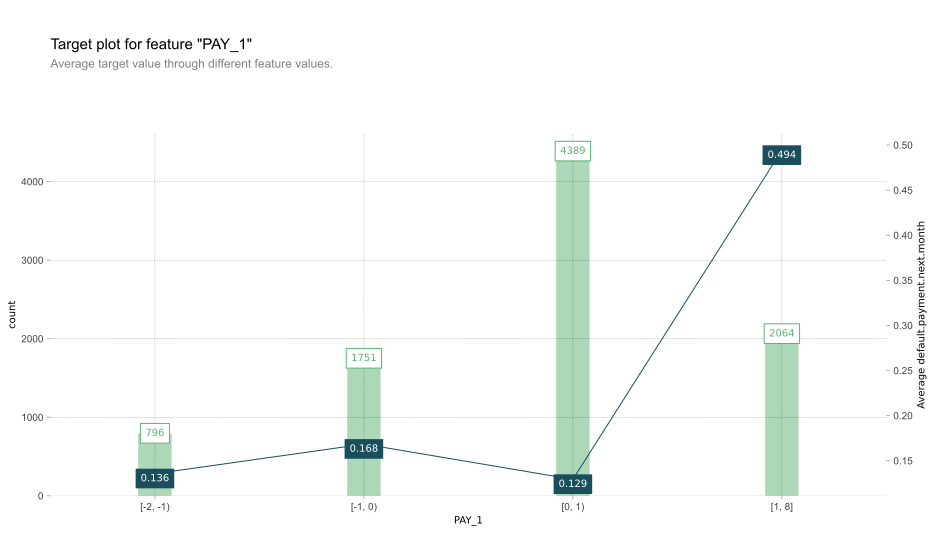

In [8]:
fig, axes, summary_df = info_plots.target_plot(
    df=df, feature=FEATURE, feature_name=FEATURE, target=target
)
# _ = axes['bar_ax'].set_xticklabels([1, 2, 3, 4])

In [9]:
summary_df

x display_column  value_lower  value_upper  count  \
0  0       [-2, -1)         -2.0         -1.0    796   
1  1        [-1, 0)         -1.0          0.0   1751   
2  2         [0, 1)          0.0          1.0   4389   
3  3         [1, 8]          1.0          8.0   2064   

   default.payment.next.month  
0                    0.135678  
1                    0.168475  
2                    0.129414  
3                    0.494186

## 1.2 check prediction distribution through feature $FEATURE$

In [10]:
import joblib
model = joblib.load('rf.sav')
model

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(criterion='entropy', max_depth=8,
                                        min_samples_split=4, random_state=7))])

In [11]:
?info_plots.actual_plot

Signature:
info_plots.actual_plot(
    model,
    X,
    feature,
    feature_name,
    num_grid_points=10,
    grid_type='percentile',
    percentile_range=None,
    grid_range=None,
    cust_grid_points=None,
    show_percentile=False,
    show_outliers=False,
    endpoint=True,
    which_classes=None,
    predict_kwds={},
    ncols=2,
    figsize=None,
    plot_params=None,
)
Docstring:
Plot prediction distribution across different feature values (feature grid)

Parameters
----------

model: a fitted sklearn model
X: pandas DataFrame
    data set on which the model is trained
feature: string or list
    feature or feature list to investigate
    for one-hot encoding features, feature list is required
feature_name: string
    name of the feature, not necessary a column name
num_grid_points: integer, optional, default=10
    number of grid points for numeric feature
grid_type: string, optional, default='percentile'
    'percentile' or 'equal',
    type of grid points for numeric featu

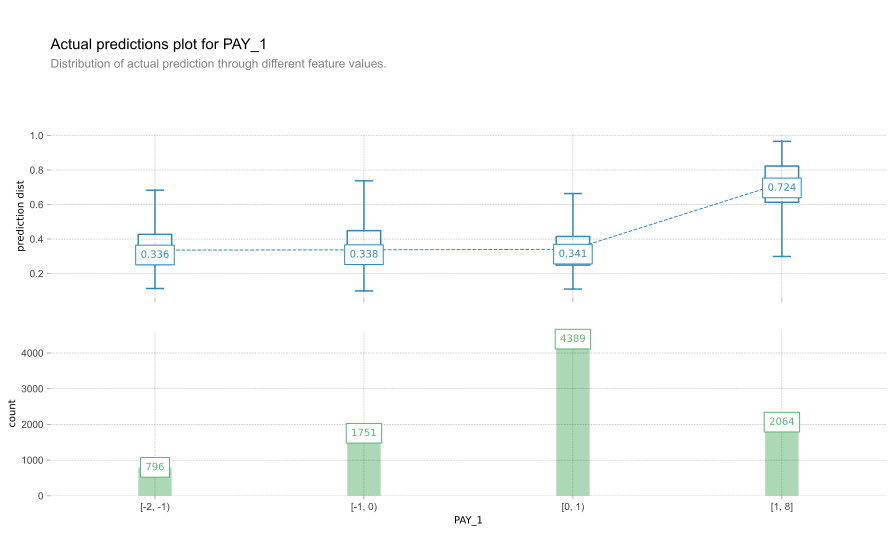

In [12]:
fig, axes, summary_df = info_plots.actual_plot(
    model=model, X=X, feature=FEATURE, feature_name=FEATURE
)

In [13]:
summary_df

x display_column  value_lower  value_upper  count  actual_prediction_q1  \
0  0       [-2, -1)         -2.0         -1.0    796              0.253078   
1  1        [-1, 0)         -1.0          0.0   1751              0.254150   
2  2         [0, 1)          0.0          1.0   4389              0.249117   
3  3         [1, 8]          1.0          8.0   2064              0.613114   

   actual_prediction_q2  actual_prediction_q3  
0              0.335692              0.427286  
1              0.337519              0.448778  
2              0.340582              0.414924  
3              0.724148              0.823203

## 1.3 pdp for feature $FEATURE$

In [14]:
pdp_feature = pdp.pdp_isolate(
    model=model, dataset=df, model_features=X.columns, feature=FEATURE
)

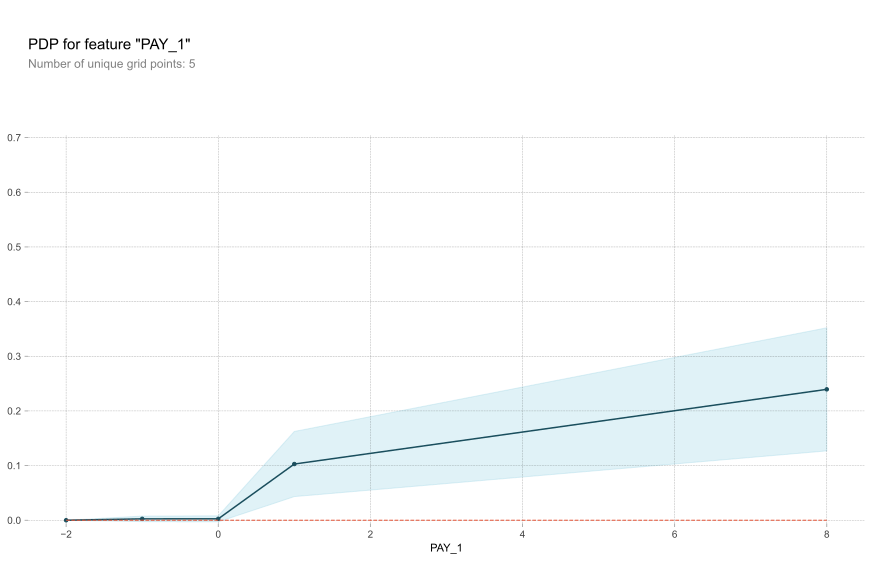

In [15]:
# default
fig, axes = pdp.pdp_plot(pdp_feature, FEATURE)
# _ = axes['pdp_ax'].set_xticklabels(['Female', 'Male'])

In [16]:
df.PAY_1.unique()

array([ 0,  1,  2, -2, -1,  3,  4,  5,  7,  6,  8])

In [17]:
# more info
fig, axes = pdp.pdp_plot(pdp_feature, FEATURE, plot_lines=True, frac_to_plot=0.5, plot_pts_dist=True)
plt.savefig('pay1.svg')

# 2. one-hot encoding feature: embarked
for one-hot encoding feature, should provide a list containing all the related columns

In [18]:
X.columns

Index(['LIMIT_BAL', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'SEX_1', 'SEX_2', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3',
       'BINNED_AGE_21-25', 'BINNED_AGE_25-28', 'BINNED_AGE_28-30',
       'BINNED_AGE_30-32', 'BINNED_AGE_32-35', 'BINNED_AGE_35-39',
       'BINNED_AGE_39-42', 'BINNED_AGE_42-48', 'BINNED_AGE_48-79',
       'AVG_BILL_AMT', 'AVG_PAY_AMT', 'LIMIT_UTIL1', 'PERC_PAID1',
       'LIMIT_UTIL2', 'PERC_PAID2', 'LIMIT_UTIL3', 'PERC_PAID3', 'LIMIT_UTIL4',
       'PERC_PAID4', 'LIMIT_UTIL5', 'PERC_PAID5', 'LIMIT_UTIL6', 'PERC_PAID6',
       'EXCEEDED_LIMIT', 'OVERPAID', 'NEG_BILL'],
      dtype='object')

## 2.1 target distribution through feature 'BINNED_AGE'

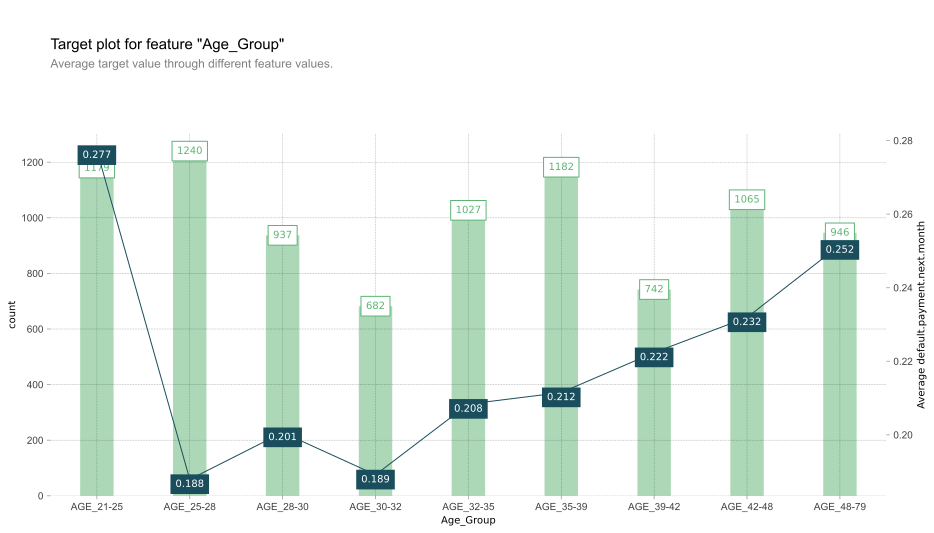

In [19]:
fig, axes, summary_df = info_plots.target_plot(
    df=df, feature=[i for i in X.columns if 'BINNED_AGE' in i], feature_name='Age_Group', 
    target=target
)
_ = axes['bar_ax'].set_xticklabels([i.replace('BINNED_', '') for i in X.columns if 'BINNED_AGE' in i])

In [20]:
summary_df

x    display_column  count  default.payment.next.month
0  0  BINNED_AGE_21-25   1179                    0.277354
1  1  BINNED_AGE_25-28   1240                    0.187903
2  2  BINNED_AGE_28-30    937                    0.200640
3  3  BINNED_AGE_30-32    682                    0.189150
4  4  BINNED_AGE_32-35   1027                    0.208374
5  5  BINNED_AGE_35-39   1182                    0.211506
6  6  BINNED_AGE_39-42    742                    0.222372
7  7  BINNED_AGE_42-48   1065                    0.231925
8  8  BINNED_AGE_48-79    946                    0.251586

## 2.2 check prediction distribution through feature 'BINNED_AGE'

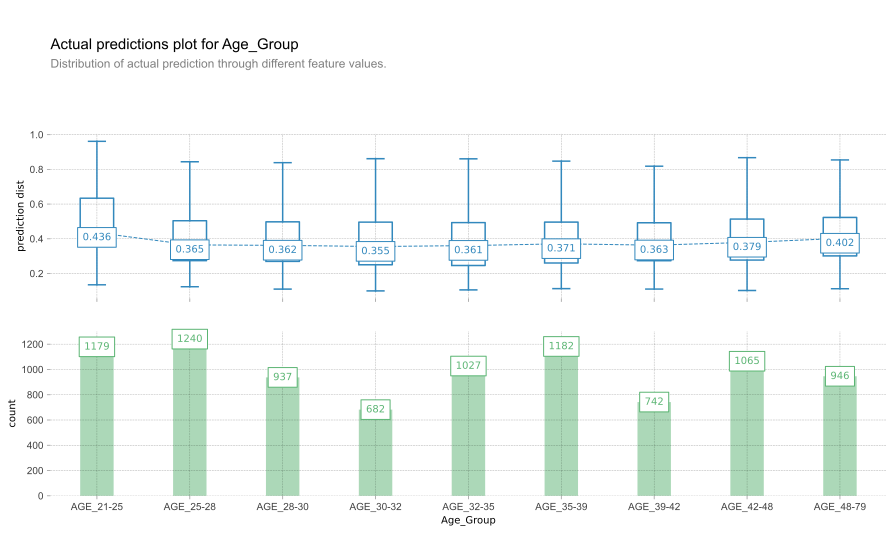

In [21]:
fig, axes, summary_df = info_plots.actual_plot(
    model=model, X=X, feature=[i for i in X.columns if 'BINNED_AGE' in i], 
    feature_name='Age_Group'
)
_ = axes['bar_ax'].set_xticklabels([i.replace('BINNED_', '') for i in X.columns if 'BINNED_AGE' in i])

In [22]:
summary_df

x    display_column  count  actual_prediction_q1  actual_prediction_q2  \
0  0  BINNED_AGE_21-25   1179              0.356482              0.435637   
1  1  BINNED_AGE_25-28   1240              0.273881              0.364847   
2  2  BINNED_AGE_28-30    937              0.269599              0.361942   
3  3  BINNED_AGE_30-32    682              0.250304              0.355288   
4  4  BINNED_AGE_32-35   1027              0.245913              0.360705   
5  5  BINNED_AGE_35-39   1182              0.260323              0.371078   
6  6  BINNED_AGE_39-42    742              0.273451              0.363118   
7  7  BINNED_AGE_42-48   1065              0.277262              0.379099   
8  8  BINNED_AGE_48-79    946              0.301260              0.402184   

   actual_prediction_q3  
0              0.633848  
1              0.503968  
2              0.497548  
3              0.495880  
4              0.493300  
5              0.496099  
6              0.492240  
7              0.513655  
8              0.522900

## 2.3 pdp for feature 'BINNED_AGE'

In [23]:
print([i.replace('BINNED_AGE_', '') for i in X.columns if 'BINNED_AGE' in i])

['21-25', '25-28', '28-30', '30-32', '32-35', '35-39', '39-42', '42-48', '48-79']


In [24]:
'''['21-25', '25-28', '28-30', '30-32', '32-35', '35-39', '39-42', '42-48', '48-79']'''.replace('\'', '')

'[21-25, 25-28, 28-30, 30-32, 32-35, 35-39, 39-42, 42-48, 48-79]'

In [25]:
pdp_binnedage = pdp.pdp_isolate(
    model=model, dataset=df, model_features=X.columns.tolist(), 
    feature=[i for i in X.columns if 'BINNED_AGE' in i]
)

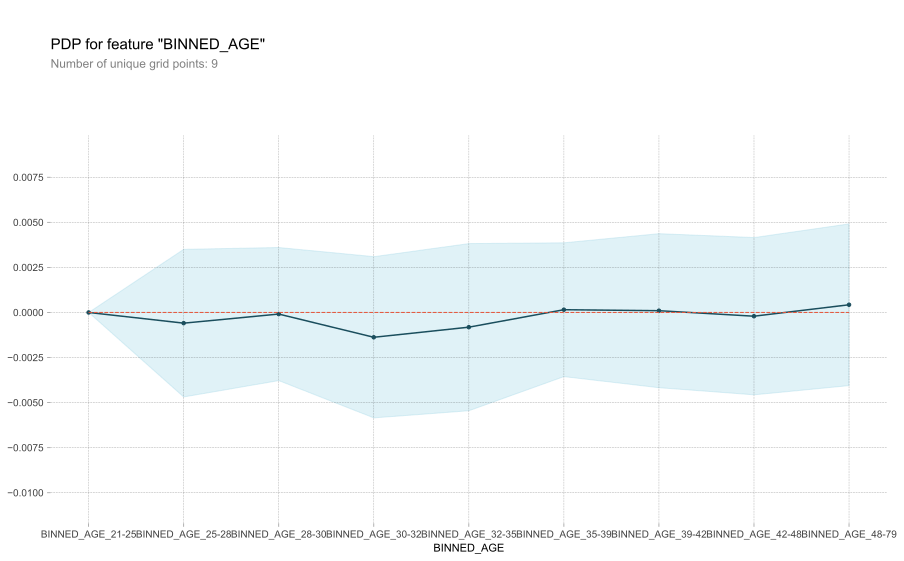

In [26]:
fig, axes = pdp.pdp_plot(pdp_binnedage, 'BINNED_AGE')
#_ = axes['bar_ax'].set_xticklabels([i.replace('BINNED_', '') for i in X.columns if 'BINNED_AGE' in i])

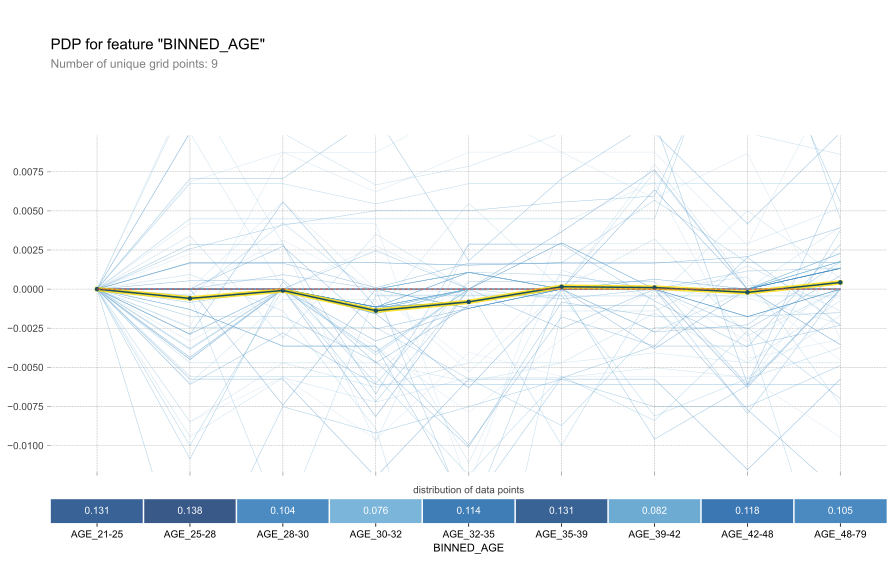

In [27]:
fig, axes = pdp.pdp_plot(pdp_binnedage, 'BINNED_AGE', center=True, plot_lines=True, frac_to_plot=100, plot_pts_dist=True)
_ = axes['pdp_ax']['_count_ax'].set_xticklabels([i.replace('BINNED_', '') for i in X.columns if 'BINNED_AGE' in i])

In [28]:
axes['pdp_ax']

{'_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fa115ae2810>,
 '_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fa115b17c50>}

# 3. numeric feature: Fare

## 3.1 target distribution through feature 'AVG_BILL_AMT'

In [29]:
NUM_FEATURE = 'AVG_BILL_AMT'

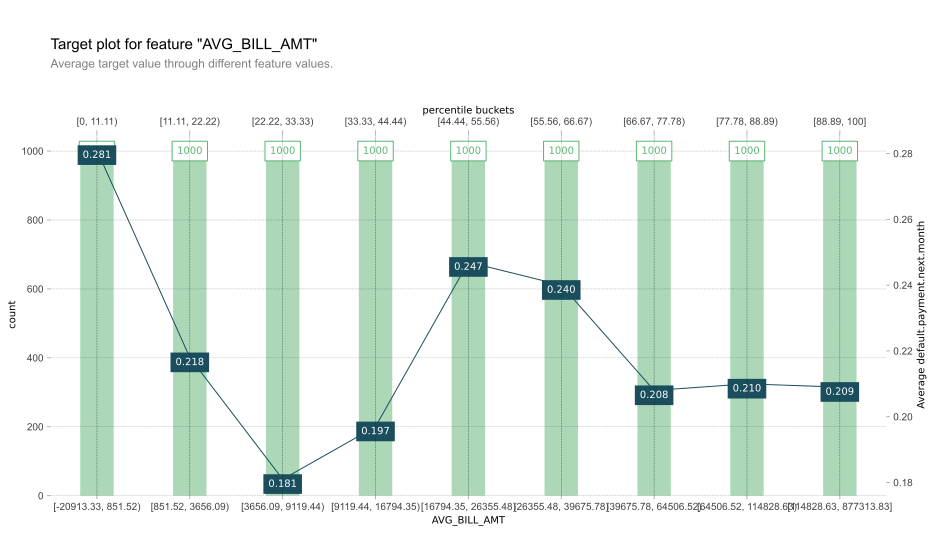

In [30]:
fig, axes, summary_df = info_plots.target_plot(
    df=df, feature=NUM_FEATURE, feature_name=NUM_FEATURE, target=target, show_percentile=True
)

In [31]:
summary_df

x          display_column    value_lower    value_upper percentile_column  \
0  0     [-20913.33, 851.52)  -20913.333333     851.518519        [0, 11.11)   
1  1       [851.52, 3656.09)     851.518519    3656.092593    [11.11, 22.22)   
2  2      [3656.09, 9119.44)    3656.092593    9119.444444    [22.22, 33.33)   
3  3     [9119.44, 16794.35)    9119.444444   16794.351852    [33.33, 44.44)   
4  4    [16794.35, 26355.48)   16794.351852   26355.481481    [44.44, 55.56)   
5  5    [26355.48, 39675.78)   26355.481481   39675.777778    [55.56, 66.67)   
6  6    [39675.78, 64506.52)   39675.777778   64506.518519    [66.67, 77.78)   
7  7   [64506.52, 114828.63)   64506.518519  114828.629630    [77.78, 88.89)   
8  8  [114828.63, 877313.83]  114828.629630  877313.833333      [88.89, 100]   

   percentile_lower  percentile_upper  count  default.payment.next.month  
0              0.00             11.11   1000                       0.281  
1             11.11             22.22   1000                       0.218  
2             22.22             33.33   1000                       0.181  
3             33.33             44.44   1000                       0.197  
4             44.44             55.56   1000                       0.247  
5             55.56             66.67   1000                       0.240  
6             66.67             77.78   1000                       0.208  
7             77.78             88.89   1000                       0.210  
8             88.89            100.00   1000                       0.209

## 3.2 check prediction distribution through feature 'AVG_BILL_AMT'

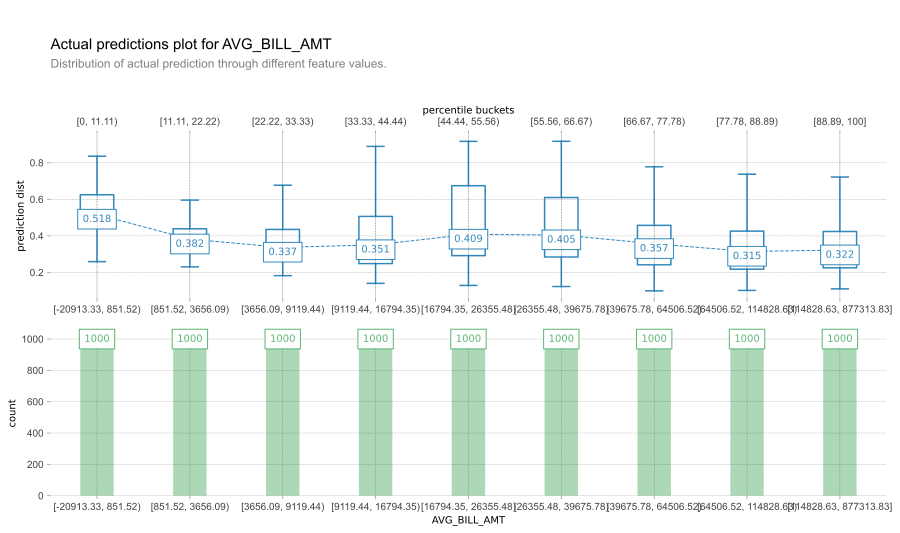

In [32]:
fig, axes, summary_df = info_plots.actual_plot(
    model=model, X=X, feature=NUM_FEATURE, feature_name=NUM_FEATURE, 
    show_percentile=True
)

In [33]:
summary_df

x          display_column    value_lower    value_upper percentile_column  \
0  0     [-20913.33, 851.52)  -20913.333333     851.518519        [0, 11.11)   
1  1       [851.52, 3656.09)     851.518519    3656.092593    [11.11, 22.22)   
2  2      [3656.09, 9119.44)    3656.092593    9119.444444    [22.22, 33.33)   
3  3     [9119.44, 16794.35)    9119.444444   16794.351852    [33.33, 44.44)   
4  4    [16794.35, 26355.48)   16794.351852   26355.481481    [44.44, 55.56)   
5  5    [26355.48, 39675.78)   26355.481481   39675.777778    [55.56, 66.67)   
6  6    [39675.78, 64506.52)   39675.777778   64506.518519    [66.67, 77.78)   
7  7   [64506.52, 114828.63)   64506.518519  114828.629630    [77.78, 88.89)   
8  8  [114828.63, 877313.83]  114828.629630  877313.833333      [88.89, 100]   

   percentile_lower  percentile_upper  count  actual_prediction_q1  \
0              0.00             11.11   1000              0.464711   
1             11.11             22.22   1000              0.333537   
2             22.22             33.33   1000              0.273791   
3             33.33             44.44   1000              0.248502   
4             44.44             55.56   1000              0.292183   
5             55.56             66.67   1000              0.284588   
6             66.67             77.78   1000              0.241904   
7             77.78             88.89   1000              0.218177   
8             88.89            100.00   1000              0.225347   

   actual_prediction_q2  actual_prediction_q3  
0              0.517803              0.625084  
1              0.382059              0.439038  
2              0.337237              0.435500  
3              0.350895              0.506660  
4              0.408649              0.674565  
5              0.404997              0.610084  
6              0.357210              0.457745  
7              0.315026              0.426385  
8              0.322321              0.424084

## 3.3 pdp for feature 'AVG_BILL_AMT'

In [34]:
pdp_avgbill = pdp.pdp_isolate(
    model=model, dataset=df, model_features=X.columns, feature=NUM_FEATURE
)

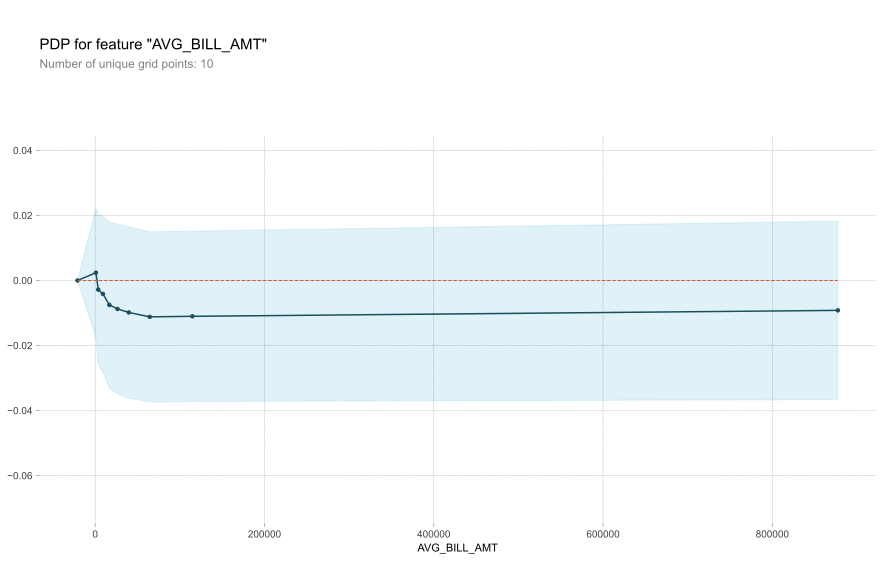

In [35]:
fig, axes = pdp.pdp_plot(pdp_avgbill, NUM_FEATURE)

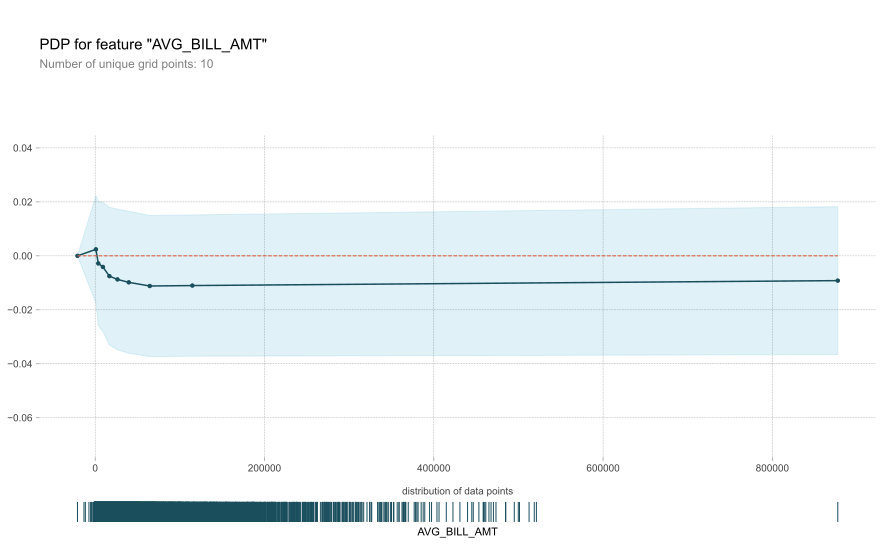

In [36]:
fig, axes = pdp.pdp_plot(pdp_avgbill, NUM_FEATURE, plot_pts_dist=True)

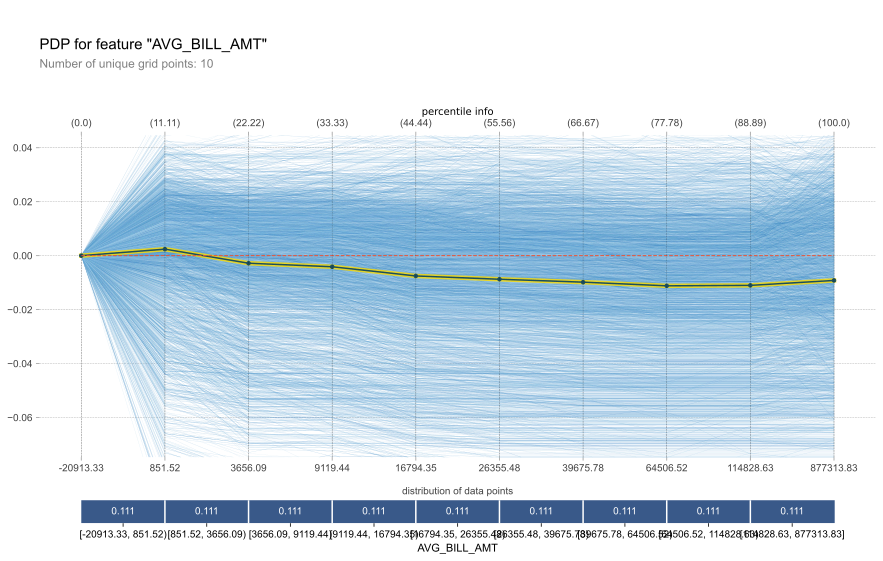

In [37]:
fig, axes = pdp.pdp_plot(
    pdp_avgbill, NUM_FEATURE, frac_to_plot=0.5, plot_lines=True, x_quantile=True, show_percentile=True, plot_pts_dist=True
)

# 4. Interaction between two variables: $FEATURE, NUM\_FEATURE$

## 4.1 target distribution through feature combination of $FEATURE, NUM\_FEATURE$

In [39]:
FEATURE, NUM_FEATURE

('PAY_1', 'AVG_BILL_AMT')

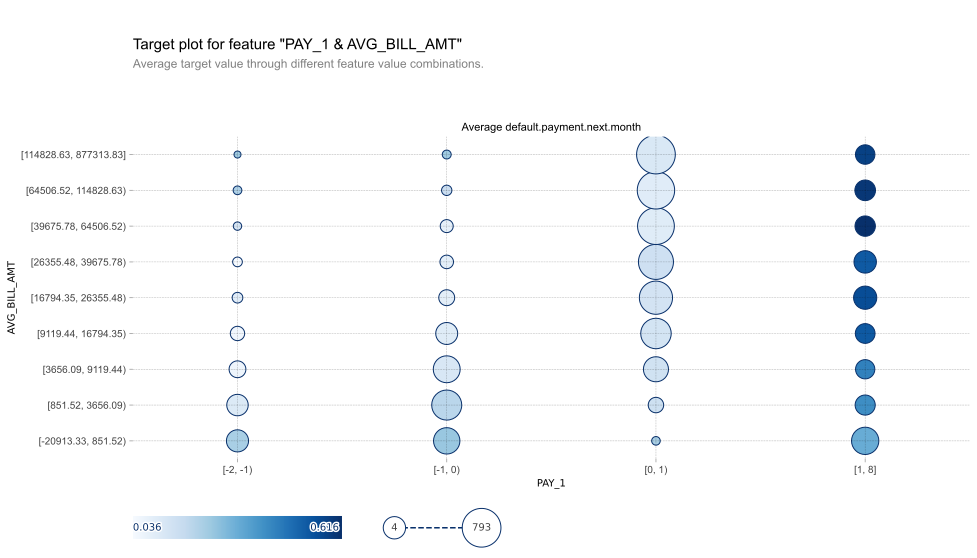

In [40]:
fig, axes, summary_df = info_plots.target_plot_interact(
    df=df, features=[FEATURE, NUM_FEATURE], feature_names=[FEATURE, NUM_FEATURE], target=target
)

In [41]:
summary_df.head()

x1  x2 display_column_1      display_column_2  value_lower_1  \
0   0   0         [-2, -1)   [-20913.33, 851.52)           -2.0   
1   0   1         [-2, -1)     [851.52, 3656.09)           -2.0   
2   0   2         [-2, -1)    [3656.09, 9119.44)           -2.0   
3   0   3         [-2, -1)   [9119.44, 16794.35)           -2.0   
4   0   4         [-2, -1)  [16794.35, 26355.48)           -2.0   

   value_upper_1  value_lower_2  value_upper_2  count  \
0           -1.0  -20913.333333     851.518519    244   
1           -1.0     851.518519    3656.092593    228   
2           -1.0    3656.092593    9119.444444    131   
3           -1.0    9119.444444   16794.351852     89   
4           -1.0   16794.351852   26355.481481     39   

   default.payment.next.month  
0                    0.233607  
1                    0.114035  
2                    0.061069  
3                    0.056180  
4                    0.102564

## 4.2 prediction distribution through feature combination of $FEATURE, NUM\_FEATURE$

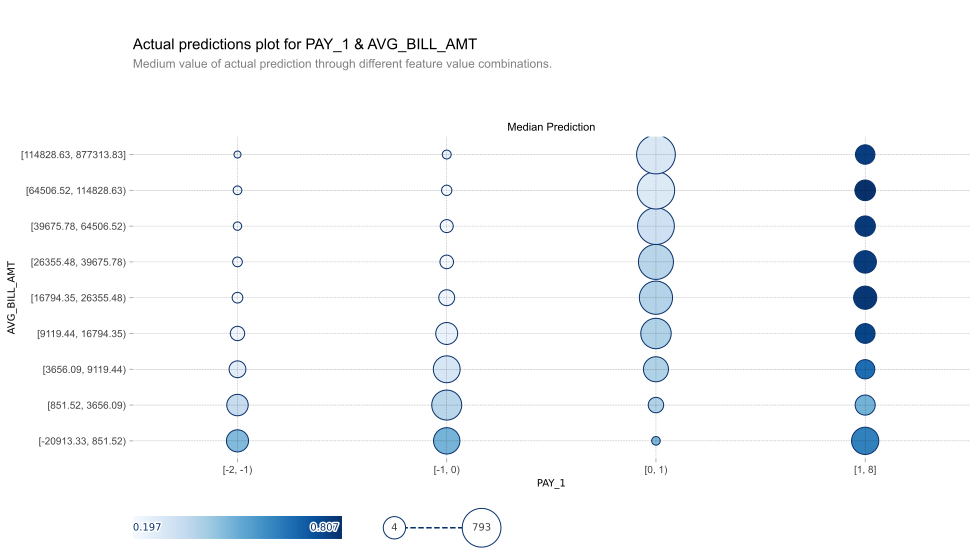

In [42]:
fig, axes, summary_df = info_plots.actual_plot_interact(
    model=model, X=X, features=[FEATURE, NUM_FEATURE], feature_names=[FEATURE, NUM_FEATURE]
)

In [43]:
summary_df.head()

x1  x2 display_column_1      display_column_2  value_lower_1  \
0   0   0         [-2, -1)   [-20913.33, 851.52)           -2.0   
1   0   1         [-2, -1)     [851.52, 3656.09)           -2.0   
2   0   2         [-2, -1)    [3656.09, 9119.44)           -2.0   
3   0   3         [-2, -1)   [9119.44, 16794.35)           -2.0   
4   0   4         [-2, -1)  [16794.35, 26355.48)           -2.0   

   value_upper_1  value_lower_2  value_upper_2  count  actual_prediction_q1  \
0           -1.0  -20913.333333     851.518519    244              0.426079   
1           -1.0     851.518519    3656.092593    228              0.306278   
2           -1.0    3656.092593    9119.444444    131              0.232728   
3           -1.0    9119.444444   16794.351852     89              0.189578   
4           -1.0   16794.351852   26355.481481     39              0.161492   

   actual_prediction_q2  actual_prediction_q3  
0              0.471208              0.606240  
1              0.343588              0.378365  
2              0.263423              0.306513  
3              0.214581              0.265962  
4              0.198191              0.255482

## 4.3 pdp for feature combination of $FEATURE, NUM\_FEATURE$

In [44]:
inter1 = pdp.pdp_interact(
    model=model, dataset=df, model_features=X.columns, features=[FEATURE, NUM_FEATURE]
)

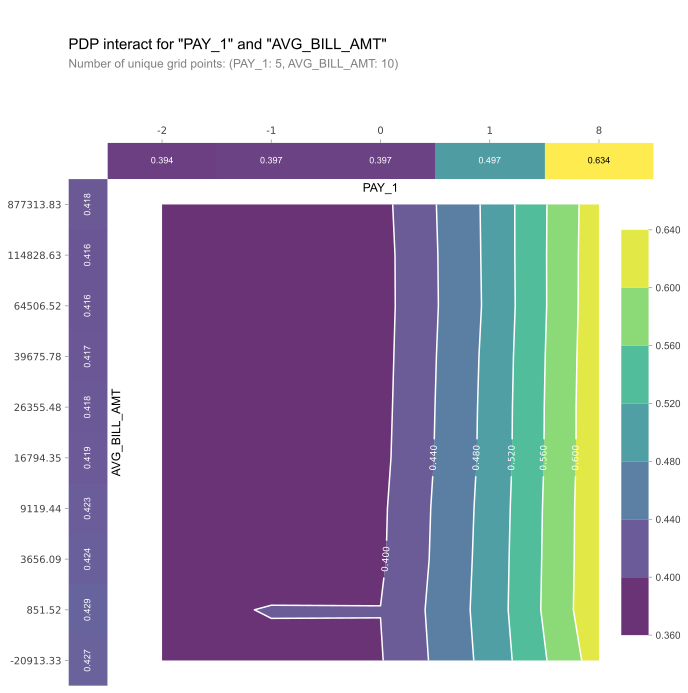

In [45]:
fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out=inter1, feature_names=[FEATURE, NUM_FEATURE], plot_type='contour', x_quantile=True, plot_pdp=True
)

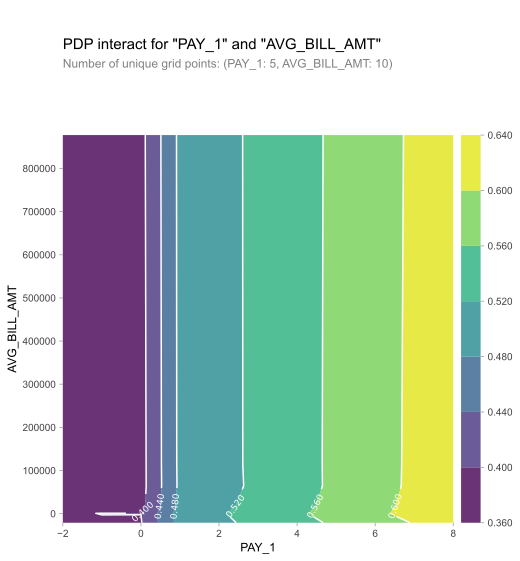

In [46]:
fig, axes = pdp.pdp_interact_plot(inter1, [FEATURE, NUM_FEATURE], plot_type='contour', x_quantile=False, plot_pdp=False)

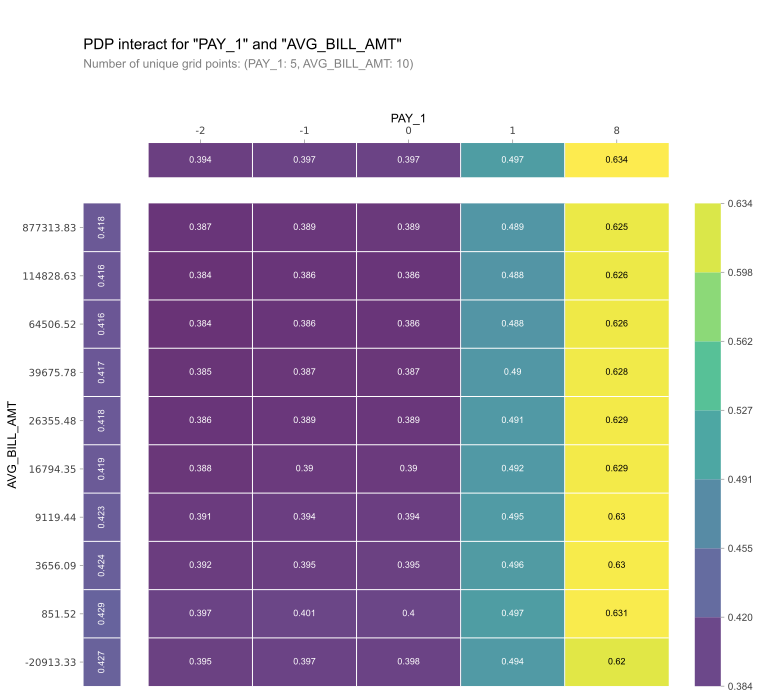

In [47]:
fig, axes = pdp.pdp_interact_plot(inter1, [FEATURE, NUM_FEATURE], plot_type='grid', x_quantile=True, plot_pdp=True)